In [1]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

#### DDOS DDoS Botnet Attack on IOT Devices

### Data Collection

In [2]:
# Baca dataset
df = pd.read_csv("DDoSdata.csv")

C:\Users\MUHAMMAD ASWAR\AppData\Local\Temp\ipykernel_26492\3051160314.py:2: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DDoSdata.csv")


In [3]:
df.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


### EDA

In [4]:
# Menampilkan kolom yang ada pada datasett
df.columns

Index(['Unnamed: 0', 'pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

In [5]:
# Drop columns that represent 'id' and get dataset information
df.drop(['Unnamed: 0', 'pkSeqID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 45 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   stime                             float64
 1   flgs                              object 
 2   flgs_number                       int64  
 3   proto                             object 
 4   proto_number                      int64  
 5   saddr                             object 
 6   sport                             object 
 7   daddr                             object 
 8   dport                             object 
 9   pkts                              int64  
 10  bytes                             int64  
 11  state                             object 
 12  state_number                      int64  
 13  ltime                             float64
 14  seq                               int64  
 15  dur                               float64
 16  mean                              fl

In [6]:
# Count number of null values in each column of dataset
df.isna().sum()

stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate                                0
srate       

In [7]:
# Drop some columns that have no role in definition of detecting a DDos attack
df.drop(['saddr', 'daddr', 'category', 'state', 'proto', 'flgs_number', 'stime', 
         'ltime', 'seq', 'mean', 'sum', 'proto_number', 'sport', 'dport'], axis=1, inplace=True)
df.head()


,flgs,pkts,bytes,state_number,dur,stddev,min,max,spkts,dpkts,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategory
0,e,10,1729,1,6.406424,0.544126,0.135347,1.223599,6,4,...,1.26889,1.21662,40,38,1.56093,1.21662,328,308,1,HTTP
1,e,10,1604,1,6.405851,0.544197,0.135375,1.223769,6,4,...,1.26889,1.21662,40,38,1.56107,1.21662,328,308,1,HTTP
2,e,8,1708,1,6.401038,1.110847,0.000000,2.221694,5,3,...,1.26889,1.21662,40,38,1.24980,1.21662,328,308,1,HTTP
3,e,8,1462,1,6.400703,1.113328,0.000000,2.226655,5,3,...,1.26889,1.21662,40,38,1.24986,1.21662,328,308,1,HTTP
4,e,8,1296,1,6.400472,1.113098,0.000000,2.226195,5,3,...,1.26889,1.21662,40,38,1.24991,1.21662,328,308,1,HTTP


In [8]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['subcategory'], prefix_sep='')
df = pd.get_dummies(df, columns=['flgs'], prefix_sep='')
df.head()

,pkts,bytes,state_number,dur,stddev,min,max,spkts,dpkts,sbytes,...,subcategoryNormal,subcategoryTCP,subcategoryUDP,flgse,flgse &,flgse *,flgse d,flgse g,flgse s,flgseU
0,10,1729,1,6.406424,0.544126,0.135347,1.223599,6,4,963,...,False,False,False,True,False,False,False,False,False,False
1,10,1604,1,6.405851,0.544197,0.135375,1.223769,6,4,838,...,False,False,False,True,False,False,False,False,False,False
2,8,1708,1,6.401038,1.110847,0.000000,2.221694,5,3,1008,...,False,False,False,True,False,False,False,False,False,False
3,8,1462,1,6.400703,1.113328,0.000000,2.226655,5,3,762,...,False,False,False,True,False,False,False,False,False,False
4,8,1296,1,6.400472,1.113098,0.000000,2.226195,5,3,596,...,False,False,False,True,False,False,False,False,False,False


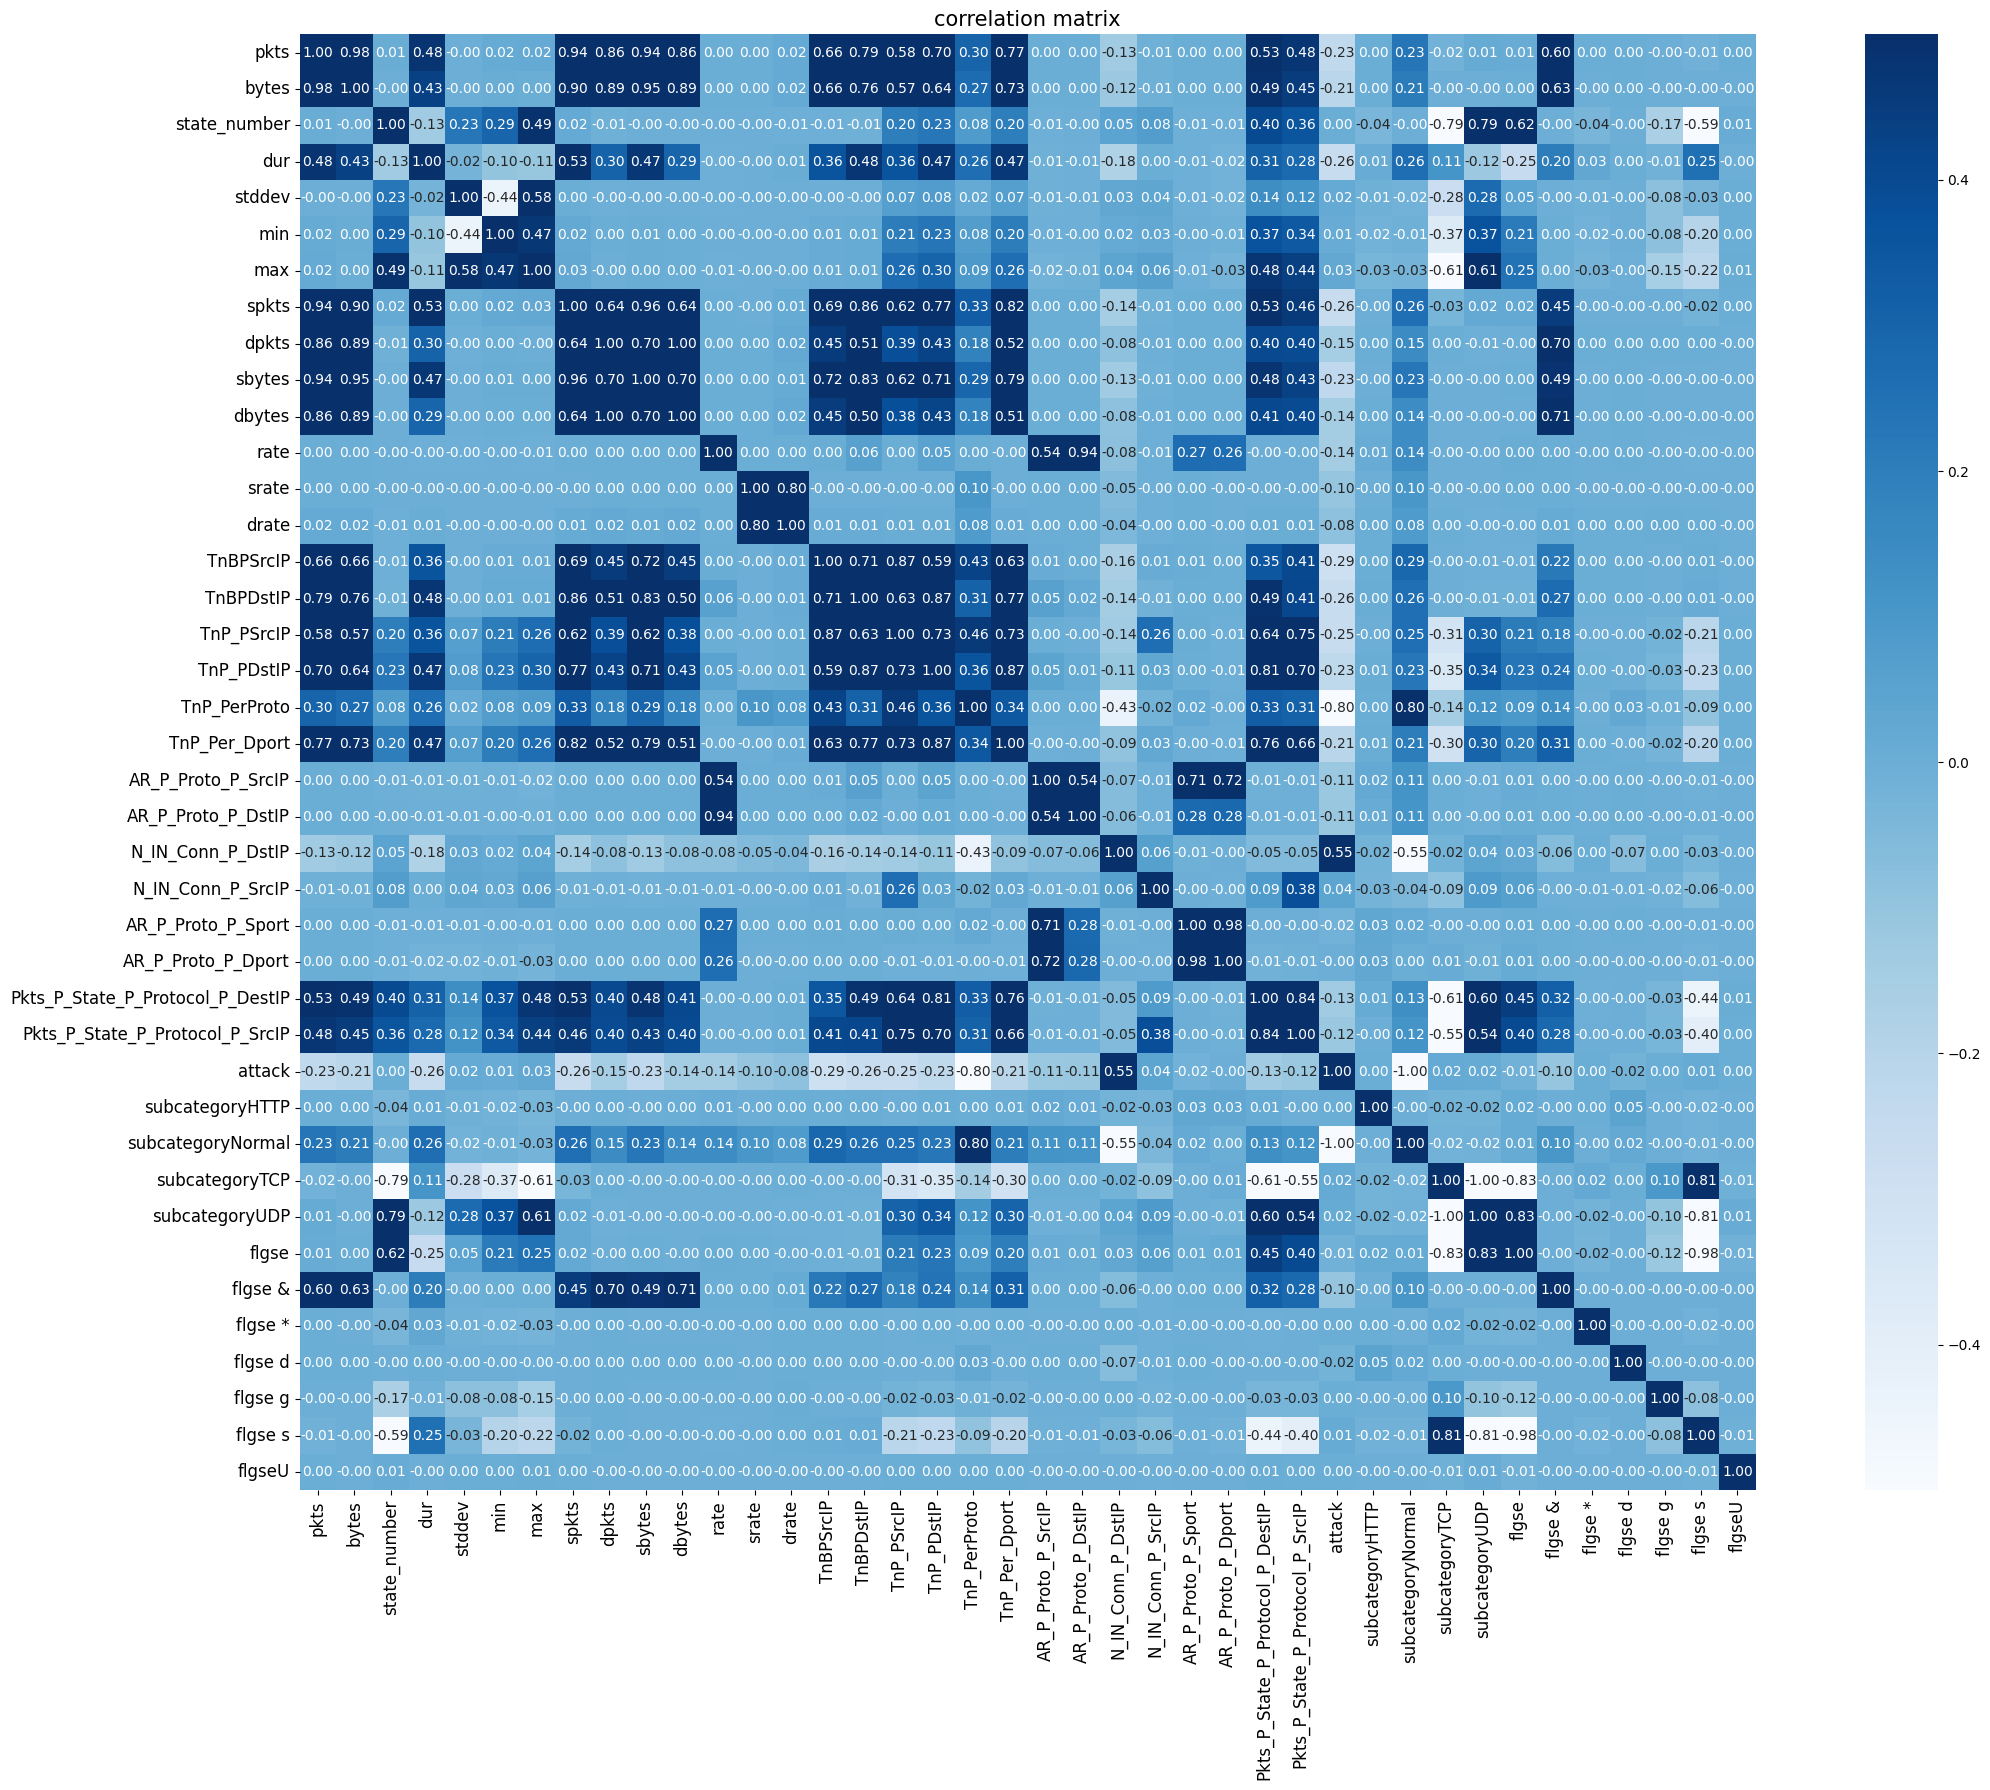

In [9]:
# Correlation between each pair of columns
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(df_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 10}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=12)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=12)

ax.set_title('correlation matrix', fontsize=15)
plt.tight_layout()
plt.savefig("heatmap.png", dpi=500)

In [10]:
# Drop columns with high correlation (only one column between two columns)
cor_matrix = df_corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['bytes', 'sbytes', 'dbytes', 'AR_P_Proto_P_Dport', 'subcategoryNormal', 'subcategoryUDP', 'flgse s']


In [1]:
df = df.drop(to_drop, axis=1)
df.head()

NameError: name 'df' is not defined

### DATA PRE-PROCESSING


In [12]:
from sklearn import preprocessing

cols = df.columns
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df.values)
df = pd.DataFrame(scaled_df, columns=cols)
df.head()

,pkts,state_number,dur,stddev,min,max,spkts,dpkts,rate,srate,...,Pkts_P_State_P_Protocol_P_SrcIP,attack,subcategoryHTTP,subcategoryTCP,flgse,flgse &,flgse *,flgse d,flgse g,flgseU
0,0.000128,0.0,0.003301,0.217933,0.027176,0.244720,0.000143,0.000114,0.000015,7.804670e-07,...,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000128,0.0,0.003301,0.217961,0.027181,0.244754,0.000143,0.000114,0.000015,7.805360e-07,...,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000100,0.0,0.003298,0.444915,0.000000,0.444339,0.000114,0.000086,0.000012,6.248990e-07,...,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000100,0.0,0.003298,0.445909,0.000000,0.445331,0.000114,0.000086,0.000012,6.249310e-07,...,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000100,0.0,0.003298,0.445816,0.000000,0.445239,0.000114,0.000086,0.000012,6.249540e-07,...,0.002603,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
# Memisahkan fitur (X) dan target (y)
X = df.drop(['attack'], axis=1)
y = df['attack']

# Memisahkan dataset menjadi subset pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Menampilkan distribusi nilai dalam subset pelatihan dari target (y_train)
y_train.value_counts()


attack
1.0    1541298
0.0        382
Name: count, dtype: int64

In [15]:
# Menampilkan distribusi nilai dalam subset pengujian dari target (y_test)
y_test.value_counts()


attack
1.0    385326
0.0        95
Name: count, dtype: int64

In [16]:

to_be_added_to_train = round((0.3*(1541298+382) - 382) / (1-0.3))
print(to_be_added_to_train)


660174


Jumlah sampel tambahan yang perlu ditambahkan ke subset pelatihan agar proporsi kelas target menjadi seimbang.

In [17]:
to_be_added_to_test = round((0.3*(385326+95) - 95) / (1-0.3))
print(to_be_added_to_test)

165045


Jumlah sampel tambahan yang perlu ditambahkan ke subset pengujian agar proporsi kelas target menjadi seimbang.



In [18]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train = pd.concat([X_train, y_train], axis=1)


In [19]:
# Seleksi semua sampel dengan nilai target 0.0 dari subset pelatihan
to_resample_train = train.loc[train['attack'] == 0.0]

# oversampling pada kelas minoritas dengan mengambil sampel secara acak dengan penggantian
our_resample = to_resample_train.sample(n=to_be_added_to_train, replace=True)

# Gabungkan sampel yang telah diambil dengan DataFrame pelatihan asli
df_rebal_train = pd.concat([train, our_resample])

# Periksa kembali distribusi nilai target setelah oversampling
print(df_rebal_train['attack'].value_counts())


attack
1.0    1541298
0.0     660556
Name: count, dtype: int64


In [20]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
test = pd.concat([X_test, y_test], axis=1)

In [21]:
# Seleksi semua sampel dengan nilai target 0.0 dari subset pengujian
to_resample_test = test.loc[test['attack'] == 0.0]

# Lakukan oversampling pada kelas minoritas dengan mengambil sampel secara acak dengan penggantian
our_resample = to_resample_test.sample(n=to_be_added_to_test, replace=True)

# Gabungkan sampel yang telah diambil dengan DataFrame pengujian asli
df_rebal_test = pd.concat([test, our_resample])

# Periksa kembali distribusi nilai target setelah oversampling
print(df_rebal_test['attack'].value_counts())


attack
1.0    385326
0.0    165140
Name: count, dtype: int64


In [22]:
# Mengembalikan fitur ke variabel X_train setelah dilakukan oversampling
X_train = df_rebal_train.drop(['attack'], axis=1)

# Mengembalikan target ke variabel y_train setelah dilakukan oversampling
y_train = df_rebal_train['attack']


In [23]:
# Mengembalikan fitur ke variabel X_test setelah dilakukan oversampling
X_test = df_rebal_test.drop(['attack'], axis=1)

# Mengembalikan target ke variabel y_test setelah dilakukan oversampling
y_test = df_rebal_test['attack']


### Models

In [25]:
# Random forest

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X_train.values, y_train.values.reshape(-1))

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, random_state=1)

In [26]:
predictions = bag.predict(X_test.values)

In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), predictions.reshape(-1)))

[[165140      0]
 [     0 385326]]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test.values.reshape(-1), predictions.reshape(-1), target_names=['0.0', '1.0']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    385326

    accuracy                           1.00    550466
   macro avg       1.00      1.00      1.00    550466
weighted avg       1.00      1.00      1.00    550466



In [29]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test.values.reshape(-1), predictions.reshape(-1), average='binary')


(1.0, 1.0, 1.0, None)